In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import logging
logging.basicConfig(level=logging.ERROR)
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers==2.8.0

     |████████████████████████████████| 573kB 6.9MB/s 
     |████████████████████████████████| 133kB 18.8MB/s 
     |████████████████████████████████| 3.7MB 15.3MB/s 
     |████████████████████████████████| 890kB 52.2MB/s 
     |████████████████████████████████| 1.1MB 47.3MB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
     |████████████████████████████████| 7.0MB 45.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=7271133a81de1a52b36c14b63434a045f573009e9a91febd9d2151a97db9e6a6
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
ERROR: botocore 1.19.30 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:
!cp -r "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_dual_bert_1/" /content/
!cp -r "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_dual_bert_2/" /content/

In [ ]:
!pip install git+https://github.com/geoopt/geoopt.git
! pip install git+https://github.com/ferrine/hyrnn.git

  Cloning https://github.com/geoopt/geoopt.git to /tmp/pip-req-build-qs542flp
  Running command git clone -q https://github.com/geoopt/geoopt.git /tmp/pip-req-build-qs542flp
  Created wheel for geoopt: filename=geoopt-0.3.1-cp36-none-any.whl size=73075 sha256=11f9f4f5606bebde2de27b135d626f3b614c5a8aca88218a3800f86c79a0474e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ombijidf/wheels/10/df/30/e0d857f034c142ca5f38af048b62aae3da773b272553e5dd21
Successfully built geoopt
  Cloning https://github.com/ferrine/hyrnn.git to /tmp/pip-req-build-g_g8hmh6
  Running command git clone -q https://github.com/ferrine/hyrnn.git /tmp/pip-req-build-g_g8hmh6
  Created wheel for hyrnn: filename=hyrnn-0.0.0-cp36-none-any.whl size=13955 sha256=67f2a88e2fe22cc6c144b42bb73f37d2be8215ce035826e31bb302c021e712b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-b2_xgf89/wheels/24/c3/64/cc0e9d25d466081dc154a2a8843157f54d845b916b4ba66418
Successfully built hyrnn


In [ ]:
import pandas as pd
train_data = pd.read_csv("train_taxonomy_prediction.csv")
val_data = pd.read_csv("validation_taxonomy_prediction.csv")
test_data = pd.read_csv("test_taxonomy_prediction.csv")

train_data


,questionID,originalQuestionID,totalPossiblePoint,AnswerKey,isMultipleChoiceQuestion,includesDiagram,examName,grade,year,QCLabel,Question,subject,category,fold
0,VASoL_2008_3_34,34,1,C,1,0,Virginia Standards of Learning - Science,3,2008,matter_properties of objects_TEXT,A student is asked to bring something that fee...,NaN,Train,Easy
1,MCAS_2015_8_6,6,1,B,1,0,MCAS,8,2015,celestial_FEATURES_STELLAR,Which of the following statements best describ...,NaN,Test,Easy
2,Mercury_SC_417677,417677,1,B,1,0,Mercury,4,2015,energy_LIGHT_REFLECT,A polished metal ball looks very shiny and bri...,NaN,Test,Challenge
3,Mercury_7230423,7230423,1,A,1,0,Mercury,9,2015,LIFE_EXTINCTION_MASSEX,Which was a main force driving extensive speci...,NaN,Test,Easy
4,NYSEDREGENTS_2007_8_6,6,1,2,1,0,NYSEDREGENTS,8,2007,Life_functions_features and functions_CELLBIO_...,Compared to the amount of hereditary informati...,NaN,Train,Challenge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,Mercury_402502,402502,1,D,1,0,Mercury,8,2015,matter_chemistry_periodic table,"According to the periodic table, argon is foun...",NaN,Test,Challenge
5593,MCAS_2006_9_20,20,1,B,1,0,MCAS,9,2006,FOR_MOMENTUM,Which of the following has the least momentum?...,NaN,Train,Challenge
5594,NYSEDREGENTS_2013_8_35,35,1,4,1,0,NYSEDREGENTS,8,2013,Life_functions_features and functions_PLANT_PH...,The amount of which greenhouse gas in the air ...,NaN,Test,Easy
5595,Mercury_7082670,7082670,1,C,1,0,Mercury,7,2015,energy_LIGHT_electromagnetic spectrum,The visible light spectrum can be subdivided a...,NaN,Test,Easy


In [ ]:
test_data

,questionID,originalQuestionID,totalPossiblePoint,AnswerKey,isMultipleChoiceQuestion,includesDiagram,examName,grade,year,QCLabel,Question,subject,category,fold
0,Mercury_409529,409529,1,B,1,0,Mercury,7,2015,science_INFERENCE_experiment design,Robert is a fisherman who wants to find a way ...,NaN,Dev,Challenge
1,Mercury_7090790,7090790,1,A,1,0,Mercury,7,2015,matter_Change of state_EVAPoration,Which of these factors causes water to evapora...,NaN,Test,Challenge
2,TIMSS_2007_8_pg7,pg7,1,C,1,0,TIMSS,8,2007,matter_chemistry_atomic,Which statement is true about the particles of...,NaN,Train,Challenge
3,Mercury_7014455,7014455,1,A,1,0,Mercury,8,2015,energy_LIGHT_GENERICPROP,Which generates waves that are capable of trav...,NaN,Dev,Easy
4,NAEP_2000_8_S21+4,S21+4,1,C,1,0,NAEP,8,2000,forces and friction,To keep a heavy box sliding across a carpeted ...,NaN,Test,Challenge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,Mercury_SC_401827,401827,1,D,1,0,Mercury,5,2015,matter_properties of material_ELECCOND,Metals that easily transfer electricity are ca...,NaN,Test,Easy
1396,MDSA_2010_5_35,35,1,C,1,0,Maryland School Assessment - Science,5,2010,EARTH_human impacts_WHAT_air pollution,Many states require vehicles to be examined an...,NaN,Train,Challenge
1397,Mercury_7024483,7024483,1,D,1,0,Mercury,8,2015,Life_reproduction_DNA inheritance_inheritance,Which of these is not an inherited trait in hu...,NaN,Train,Challenge
1398,NYSEDREGENTS_2008_4_17,17,1,D,1,0,NYSEDREGENTS,4,2008,Life_functions_FUNCT_animalESS,"In order to survive, all animals need (A) heat...",NaN,Test,Easy


In [ ]:
val_data

,questionID,originalQuestionID,totalPossiblePoint,AnswerKey,isMultipleChoiceQuestion,includesDiagram,examName,grade,year,QCLabel,Question,subject,category,fold
0,MCAS_2006_9_30-v1,30,1,D,1,0,MCAS,9,2006,matter_CHANGES_PHYSICAL,Which of the following changes occurs as a sol...,NaN,Train,Challenge
1,Mercury_SC_401144,401144,1,B,1,0,Mercury,5,2015,EARTH_WEATHER_CLOUDS,"When water vapor rises and cools, the liquid w...",NaN,Train,Easy
2,NCEOGA_2013_8_46,46,1,A,1,0,North Carolina READY End-of-Grade Assessment,8,2013,EARTH_GEO_FORMATIONS,Which best describes the characteristics of a ...,NaN,Dev,Easy
3,Mercury_417146,417146,1,A,1,0,Mercury,8,2015,Life_interdependence_ecological features,Most of the oxygen in the atmosphere is made b...,NaN,Dev,Challenge
4,Mercury_7283833,7283833,1,B,1,0,Mercury,8,2015,LIFE_HEALTH_DIESEASE_PANDEMICEPIDEMIC,Which aspect of modern Life_could most likely ...,NaN,Test,Challenge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,Mercury_7128853,7128853,1,A,1,0,Mercury,8,2015,energy_SOUND_AMPLITUDE,"As the loudness of a sound wave increases, whi...",NaN,Test,Easy
774,Mercury_7245858,7245858,1,A,1,0,Mercury,7,2015,celestial_SPACEEX_HUMAN,In the initial stages of manned space explorat...,NaN,Train,Easy
775,Mercury_417462,417462,1,C,1,0,Mercury,7,2015,Life_functions_features and functions_PLANT_RE...,"During a walk in the woods, Mandy finds a plan...",NaN,Test,Easy
776,Mercury_7044065,7044065,1,D,1,0,Mercury,8,2015,EARTH_human impacts_WHAT_air pollution,What is the MAJOR cause of acid rain? (A) smel...,NaN,Test,Easy


In [ ]:
from google.colab import files

In [ ]:
import re
def clean_sentence(question):
  # print(question)
  question = re.sub('<[^>]*>', ' ',question)
  question = re.sub(' +', ' ', question)
  question = re.sub('\xa0','',question)
  question = question.rstrip()
  question = re.sub('nan','',question)
  question = re.sub(u'\u2004','',question)
  question = re.sub(u'\u2009','',question)

  # question = question.decode("utf-8")
  # question = question.replace(u'\u200\d*','').encode("utf-8")
  question = re.sub('&nbsp','',question)
  question = re.sub('&ndash','',question)
  question = re.sub('\r','',question)
  question = re.sub('\t','',question)
  question = re.sub('\n',' ',question)

  question = re.sub('MathType@.*','',question)
  question = re.sub('&thinsp','',question)
  question = re.sub('&times','',question)
  question = re.sub('\u200b','',question)
  question = re.sub('&rarr;;;','',question)

  return question

In [ ]:
# final_data_1 = final_data.loc[0:71003,:]
# final_data_1

In [ ]:
import transformers
print(transformers.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

2.8.0


In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
train_data["QCLabel"].value_counts()

celestial_cycles                                                 106
matter_chemistry_periodic table                                   85
matter_chemistry_atomic                                           79
matter_CHANGES_CHEMICAL                                           72
science_INFERENCE_observation                                     69
                                                                ... 
science_INFERENCE_INFERENCE                                        1
energy_ELEC_COND                                                   1
Life_functions_features and functions_CELLBIO_STRUCT_GOLGI         1
matter_measurement_UNIT_TEMP                                       1
LIFE_environment and adaptation_animal adaptations_BEHAV_HUNT      1
Name: QCLabel, Length: 416, dtype: int64

In [ ]:
test_data["QCLabel"].value_counts()

Life_reproduction_DNA inheritance_inheritance                    26
celestial_cycles                                                 26
Life_functions_features and functions_PLANT_PHOTOSYNTH           22
matter_chemistry_atomic                                          21
science_INFERENCE_experiment design                              19
                                                                 ..
force_work                                                        1
celestial_APPARENTMOTION Celestial_cycles                         1
energy_WAVES_FREQWL                                               1
Life_reproduction                                                 1
LIFE_environment and adaptation_animal adaptations_STRUCT_FAT     1
Name: QCLabel, Length: 352, dtype: int64

In [ ]:

# from sklearn.preprocessing import LabelEncoder

# LE = LabelEncoder()
# final_data['label'] = LE.fit_transform(final_data['board_syllabus'])
# final_data.head()

In [ ]:
# def get_labels(prediction):
#     predicted_label =  LE.inverse_transform([prediction])
#     return predicted_label[0]

In [ ]:
# get_labels(330)

In [ ]:
# train_data = pd.concat([train_data,val_data])
# train_data

In [ ]:
train_features = train_data["Question"]
test_features = test_data["Question"]
train_labels = train_data["QCLabel"]
test_labels = test_data["QCLabel"]
val_features = val_data["Question"]
val_labels = val_data["QCLabel"]

In [ ]:
train_labels.value_counts()

celestial_cycles                                                 106
matter_chemistry_periodic table                                   85
matter_chemistry_atomic                                           79
matter_CHANGES_CHEMICAL                                           72
science_INFERENCE_observation                                     69
                                                                ... 
science_INFERENCE_INFERENCE                                        1
energy_ELEC_COND                                                   1
Life_functions_features and functions_CELLBIO_STRUCT_GOLGI         1
matter_measurement_UNIT_TEMP                                       1
LIFE_environment and adaptation_animal adaptations_BEHAV_HUNT      1
Name: QCLabel, Length: 416, dtype: int64

In [ ]:
test_labels.value_counts()

Life_reproduction_DNA inheritance_inheritance                    26
celestial_cycles                                                 26
Life_functions_features and functions_PLANT_PHOTOSYNTH           22
matter_chemistry_atomic                                          21
science_INFERENCE_experiment design                              19
                                                                 ..
force_work                                                        1
celestial_APPARENTMOTION Celestial_cycles                         1
energy_WAVES_FREQWL                                               1
Life_reproduction                                                 1
LIFE_environment and adaptation_animal adaptations_STRUCT_FAT     1
Name: QCLabel, Length: 352, dtype: int64

In [ ]:

question_answer = train_features.values
categories = train_labels.values

In [ ]:
question_answer

array(['A student is asked to bring something that feels rough to class. Which would be BEST for him to bring? (A) Pillow (B) Marble (C) Sandpaper (D) Trading card',
       'Which of the following statements best describes the role of gravity in the formation of stars? (A) Gravity converts solid matter into gases and light energy. (B) Gravity causes gases and dust particles to condense into spheres. (C) Gravity cools gases and liquids until they become one solid mass. (D) Gravity pushes rocks and dust particles outward from a dense center.',
       'A polished metal ball looks very shiny and bright on a sunny day. What makes the ball look shiny? (A) The ball makes light. (B) The ball reflects light. (C) The ball absorbs light and then releases it. (D) The ball absorbs light and keeps it inside.',
       ...,
       'The amount of which greenhouse gas in the air will increase the most if large forests are cut down to be used for building materials without planting new trees in their pla

In [ ]:
categories

array(['matter_properties of objects_TEXT', 'celestial_FEATURES_STELLAR',
       'energy_LIGHT_REFLECT', ...,
       'Life_functions_features and functions_PLANT_PHOTOSYNTH',
       'energy_LIGHT_electromagnetic spectrum',
       'Life_reproduction_DNA inheritance_DOMRECESS'], dtype=object)

In [ ]:
# val_features = test_features.values
# val_labels = test_labels.values

In [ ]:
# list(set(label_emb_data))[0]
# # list(set(train_data['board_syllabus'].values))[0]
# label_emb_data[0]

In [ ]:

import numpy as np
!pip install inflection

from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin
from bokeh.models import HoverTool
from bokeh import colors
import inflection

from nltk.stem import PorterStemmer 
ps = PorterStemmer()
from gzip import open as gopen
from pandas.core.common import flatten
import gensim.models.poincare as poincare
def get_cleaned_taxonomy(taxonomy):
  cleaned_taxonomy = []
  for value in taxonomy:
      value = ' '.join(value.split(">>"))
      # taxonomy_words = [inflection.singularize(val)  for token in value for val in token.split(" ") if val.isalpha()]
      cleaned_taxonomy.append( value )
  return cleaned_taxonomy

In [ ]:

# course_taxonomy

label_emb_data = get_cleaned_taxonomy(categories)
label_val = get_cleaned_taxonomy(val_labels)

In [ ]:
label_emb_data[0]

'matter properties of objects text'

In [ ]:
label_emb_data[2]

'energy light reflect'

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
%cd ..


In [ ]:
!git clone https://github.com/epfml/sent2vec
%cd sent2vec
!ls
!git checkout f827d014a473aa22b2fef28d9e29211d50808d48
!make
!pip install cython
%cd src
!python setup.py build_ext
!pip install .
%cd ../../

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/u/0/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/u/0/uc?export=download&confirm=r8GA&id=0B6VhzidiLvjSOWdGM0tOX1lUNEk' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=0B6VhzidiLvjSOWdGM0tOX1lUNEk" -O torontobooks_unigrams.bin && rm -rf /tmp/cookies.txt


In [ ]:
import sent2vec
model = sent2vec.Sent2vecModel()
model.load_model('torontobooks_unigrams.bin')

In [ ]:
len(list(set(label_emb_data)))

416

In [ ]:
label_input_ids = []
label_attention_masks = []
for sent in label_emb_data:

    label_encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    label_input_ids.append(label_encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    label_attention_masks.append(label_encoded_dict['attention_mask'])
label_input_ids = torch.cat(label_input_ids, dim=0)
label_attention_masks = torch.cat(label_attention_masks, dim=0)

In [ ]:
taxonomy_vectors = []
for label_input_id,label_att_mask in zip(label_input_ids,label_attention_masks):
    label_input_id = label_input_id.to(device)
    label_att_mask = label_att_mask.to(device)
    with torch.no_grad():
      outputs = model_label(label_input_id.reshape(1,-1),label_att_mask.reshape(1,-1))
    taxonomy_vectors.append(outputs.cpu().numpy())
taxonomy_vectors = np.vstack(taxonomy_vectors)
taxonomy_vectors.shape


(312, 768)

In [ ]:
label_input_ids_val = []
label_attention_masks_val = []
for sent in label_val:

    label_encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    label_input_ids_val.append(label_encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    label_attention_masks_val.append(label_encoded_dict['attention_mask'])
label_input_ids_val = torch.cat(label_input_ids_val, dim=0)
label_attention_masks_val = torch.cat(label_attention_masks_val, dim=0)

In [ ]:
# taxonomy_vectors = []
# for label_input_id,label_att_mask in zip(label_input_ids,label_attention_masks):
#     label_input_id = label_input_id.to(device)
#     label_att_mask = label_att_mask.to(device)
#     with torch.no_grad():
#       outputs = model_label(label_input_id.reshape(1,-1),label_att_mask.reshape(1,-1))
#     taxonomy_vectors.append(outputs[1].cpu().numpy())
# taxonomy_vectors = np.vstack(taxonomy_vectors)
# taxonomy_vectors.shape


In [ ]:
# taxonomy_vectors_val = []
# for feature in poincare_val:
#   taxonomy_vectors_val.append(model.embed_sentences([feature]))
# taxonomy_vectors_val = np.vstack(taxonomy_vectors_val)
# taxonomy_vectors_val.shape

In [ ]:
test_data

,questionID,originalQuestionID,totalPossiblePoint,AnswerKey,isMultipleChoiceQuestion,includesDiagram,examName,grade,year,QCLabel,Question,subject,category,fold
0,Mercury_409529,409529,1,B,1,0,Mercury,7,2015,science_INFERENCE_experiment design,Robert is a fisherman who wants to find a way ...,NaN,Dev,Challenge
1,Mercury_7090790,7090790,1,A,1,0,Mercury,7,2015,matter_Change of state_EVAPoration,Which of these factors causes water to evapora...,NaN,Test,Challenge
2,TIMSS_2007_8_pg7,pg7,1,C,1,0,TIMSS,8,2007,matter_chemistry_atomic,Which statement is true about the particles of...,NaN,Train,Challenge
3,Mercury_7014455,7014455,1,A,1,0,Mercury,8,2015,energy_LIGHT_GENERICPROP,Which generates waves that are capable of trav...,NaN,Dev,Easy
4,NAEP_2000_8_S21+4,S21+4,1,C,1,0,NAEP,8,2000,forces and friction,To keep a heavy box sliding across a carpeted ...,NaN,Test,Challenge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,Mercury_SC_401827,401827,1,D,1,0,Mercury,5,2015,matter_properties of material_ELECCOND,Metals that easily transfer electricity are ca...,NaN,Test,Easy
1396,MDSA_2010_5_35,35,1,C,1,0,Maryland School Assessment - Science,5,2010,EARTH_human impacts_WHAT_air pollution,Many states require vehicles to be examined an...,NaN,Train,Challenge
1397,Mercury_7024483,7024483,1,D,1,0,Mercury,8,2015,Life_reproduction_DNA inheritance_inheritance,Which of these is not an inherited trait in hu...,NaN,Train,Challenge
1398,NYSEDREGENTS_2008_4_17,17,1,D,1,0,NYSEDREGENTS,4,2008,Life_functions_FUNCT_animalESS,"In order to survive, all animals need (A) heat...",NaN,Test,Easy


In [ ]:
# np.array(poincare_embedding).shape

In [ ]:
input_ids = []
attention_masks = []

for sent in question_answer:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

Original:  A student is asked to bring something that feels rough to class. Which would be BEST for him to bring? (A) Pillow (B) Marble (C) Sandpaper (D) Trading card
Token IDs: tensor([  101,  1037,  3076,  2003,  2356,  2000,  3288,  2242,  2008,  5683,
         5931,  2000,  2465,  1012,  2029,  2052,  2022,  2190,  2005,  2032,
         2000,  3288,  1029,  1006,  1037,  1007, 10005,  1006,  1038,  1007,
         7720,  1006,  1039,  1007,  5472, 23298,  1006,  1040,  1007,  6202,
         4003,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,

In [ ]:
input_ids_val = []
attention_masks_val = []

for sent in val_features:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_val.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_val.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

Original:  A student is asked to bring something that feels rough to class. Which would be BEST for him to bring? (A) Pillow (B) Marble (C) Sandpaper (D) Trading card
Token IDs: tensor([  101,  1037,  3076,  2003,  2356,  2000,  3288,  2242,  2008,  5683,
         5931,  2000,  2465,  1012,  2029,  2052,  2022,  2190,  2005,  2032,
         2000,  3288,  1029,  1006,  1037,  1007, 10005,  1006,  1038,  1007,
         7720,  1006,  1039,  1007,  5472, 23298,  1006,  1040,  1007,  6202,
         4003,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,

In [ ]:
num_classes = len(list(set(categories)))
num_classes

416

In [ ]:
from torch.utils.data import TensorDataset, random_split
# train_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)
# val_poincare_tensor = torch.tensor(taxonomy_vectors_val,dtype=torch.float)

val_dataset = TensorDataset(input_ids_val,attention_masks_val,label_input_ids_val,label_attention_masks_val)
# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(input_ids, attention_masks, label_input_ids,label_attention_masks)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [ ]:
# !pip install transformers==2.8.0
import transformers
print(transformers.__version__)

2.8.0


In [ ]:
set(question_answer).intersection(set(test_features))

set()

In [ ]:

import sys
import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from torch.nn.modules.loss import HingeEmbeddingLoss
from random import randint

from tqdm import tqdm
import geoopt
import time
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from torch.nn.modules.loss import HingeEmbeddingLoss
from random import randint
import torch.nn.functional as F

import time
import argparse
cos = nn.CosineSimilarity(dim=0, eps=1e-6)
# Neural Classifierwork
class MulticlassClassifier(nn.Module):
    def __init__(self,bert_model_path):
        super(MulticlassClassifier,self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=False,output_attentions=False)
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(768, 384)
        self.fc2 = nn.Linear(384, 768)

    def forward(self,tokens,masks):
        _, pooled_output = self.bert(tokens, attention_mask=masks)
        x = self.fc1(pooled_output)
        x = self.fc2(x)
        return x
class MyHingeLoss(torch.nn.Module):
    def __init__(self, margin):
        super(MyHingeLoss, self).__init__()
        self.margin = margin
    # def forward_val(self, output, target):
    #     cos = nn.CosineSimilarity(dim=0, eps=1e-6)
    #     loss = 0
    #     num_compare = 4
    #     count = 0
    #     for i in range(len(output)):
    #         v_image = output[i]
    #         t_label = target[i]
    #         for j in range(num_compare):
    #             if j != i:
    #                 count += 1
    #                 t_j = target[j]
    #                 loss += torch.relu( self.margin - cos(t_label, v_image) + cos(t_j, v_image) )
    #     return loss / count

    def forward(self, output, target):
        loss=0
        for i in range(len(output)):
            v_image = output[i]
            t_label = target[i]
            j = randint(0, len(output)-1)
            while j == i:
                j = randint(0, len(output)-1)
            t_j = target[j]
            loss+= torch.relu( self.margin - cos(t_label, v_image) + cos(t_j, v_image) )
        return loss / len(output)


In [ ]:
from transformers import BertModel, AdamW, BertConfig
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


In [ ]:
from transformers import BertModel, AdamW, BertConfig

# Loads BertModel, the pretrained BERT model with a single 
model = MulticlassClassifier('bert-base-uncased')
# model.load_state_dict(torch.load('model_euclidean_dual_bert_1/model_weights'))
model_label = MulticlassClassifier('bert-base-uncased')
# Tell pytorch to run this model on the GPU.
# model_label.load_state_dict(torch.load('model_euclidean_dual_bert_2/model_weights'))

model.cuda()
model_label.cuda()

MulticlassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
# mobius_params = []
# bert_params = []

# def mobius_params():
#   for param in model.named_parameters():
#     if 'fc' in param[0]:
#       yield param[1]
# def bert_params():
#   for param in model.named_parameters():
#     if 'bert' in param[0]:
#       yield param[1]


In [ ]:
optimizer_1 = torch.optim.AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
optimizer_2 = torch.optim.AdamW(model_label.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup


epochs = 30

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs



In [ ]:
len(train_dataloader) 

175

In [ ]:
1935 * 32

61920

In [ ]:
scheduler = get_linear_schedule_with_warmup(optimizer_1, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# import numpy as np

# # Function to calculate the accuracy of our predictions vs labels
# def flat_accuracy(preds, labels):
#     pred_flat = np.argmax(preds, axis=1).flatten()
#     labels_flat = labels.flatten()
#     return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
criterion = MyHingeLoss(0.1)


In [ ]:
import random
import numpy as np
import json
from sklearn.metrics import f1_score
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()
early_stopping = EarlyStopping(patience=6, verbose=True)

# For each epoch...
for epoch_i in range(0, epochs):
    


    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0


    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_label_input_ids = batch[2].to(device)
        b_label_att_masks = batch[3].to(device)


        model.zero_grad() 
        model_label.zero_grad()
        optimizer_1.zero_grad()       

        logits = model(b_input_ids, 
                             b_input_mask)
        label_repr = model_label(b_label_input_ids,b_label_att_masks)
        
        loss = criterion.forward(logits,label_repr)

  
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer_1.step()
        optimizer_2.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_f1 = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_label_input_id = batch[2].to(device)
        b_label_att_mask = batch[3].to(device)

        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        


          logits = model(b_input_ids, 
                              b_input_mask)
          label_repr = model_label(b_label_input_id,b_label_att_mask)
        loss = criterion(logits,label_repr)

            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()
        # Move logits and labels to CPU
        # logits = logits.detach().cpu().numpy().round()
        # label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        # total_eval_f1 += f1_score(label_ids,logits, average='macro')
        

    # Report the final accuracy for this validation run.
    # avg_val_accuracy = total_eval_f1 / len(validation_dataloader)
    # print("  f1score: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    early_stopping(avg_val_loss, model)
    if early_stopping.early_stop:
      print("Early stopping")
      break  
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    output_dir = 'model_euclidean_dual_bert_1/'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        os.makedirs("model_euclidean_dual_bert_2")

    print("Saving model to %s" % output_dir)
    tokenizer.save_pretrained(output_dir)
    torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))
    torch.save(model_label.state_dict(), os.path.join('model_euclidean_dual_bert_2', 'model_weights'))


    !rm -rf "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_dual_bert_1"
    !mv model_euclidean_dual_bert_1 "/content/drive/My Drive/research_lo_content_taxonomy_classification/"

    !rm -rf "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_dual_bert_2"
    !mv model_euclidean_dual_bert_2 "/content/drive/My Drive/research_lo_content_taxonomy_classification/"
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 30 ========
Training...


RuntimeError: ignored

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

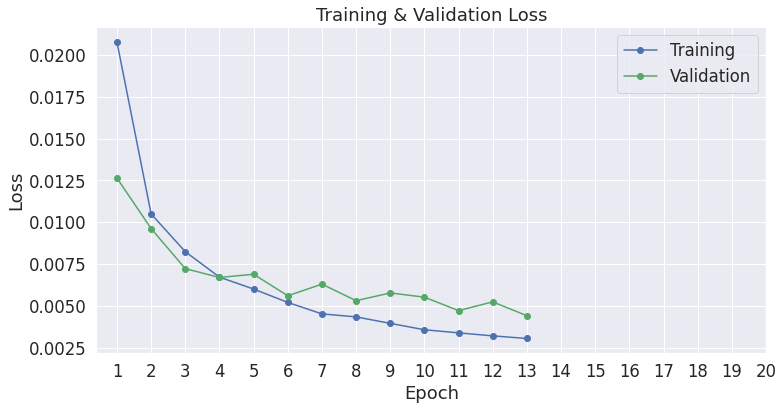

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.show()

In [ ]:
import os


output_dir = 'model_euclidean_dual_bert_1_QC/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)


# model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
# model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to model_euclidean_cos/


('model_euclidean_cos/vocab.txt',
 'model_euclidean_cos/special_tokens_map.json',
 'model_euclidean_cos/added_tokens.json')

In [ ]:
# !pip install joblib
# import joblib
# joblib.dump(LE, "label_encoder")


In [ ]:
import json
torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))


In [ ]:
# with open(os.path.join(output_dir, 'model_config.json'), 'w') as f:
#     json.dump(model.config, f)

In [ ]:
!zip -r model_euclidean_cos.zip model_euclidean_cos
# files.download('model_euclidean_1.zip')

  adding: model_euclidean_cos/ (stored 0%)
  adding: model_euclidean_cos/model_weights (deflated 7%)
  adding: model_euclidean_cos/vocab.txt (deflated 53%)
  adding: model_euclidean_cos/special_tokens_map.json (deflated 40%)
  adding: model_euclidean_cos/tokenizer_config.json (stored 0%)


In [ ]:
# !zip -r label_encoder_categorized_reduced.zip label_encoder
# files.download('label_encoder_categorized_reduced.zip')

In [ ]:
test_features = test_features.values
labels = test_labels.values

In [ ]:
test_features

array([' (a) Describe a simple experiment (or activity) to show that the polarity of emf induced in a coil is always such that it tends to produce a current which opposes the change of magnetic flux that produces it. (b) The current flowing through an inductor of self inductance L is continuously increasing. Plot a graph showing the variation of (i) Magnetic flux versus the current (ii) Induced emf versus dI/dt (iii) Magnetic potential energy stored versus the current. /* Style Definitions */ table.MsoNormalTable {mso-style-name:"Table Normal"; mso-tstyle-rowband-size:0; mso-tstyle-colband-size:0; mso-style-noshow:yes; mso-style-priority:99; mso-style-qformat:yes; mso-style-parent:""; mso-padding-alt:0in 5.4pt 0in 5.4pt; mso-para-margin-top:0in; mso-para-margin-right:0in; mso-para-margin-bottom:10.0pt; mso-para-margin-left:0in; line-height:115%; mso-pagination:widow-orphan; font-size:11.0pt; font-family:"Calibri","sans-serif"; mso-ascii-font-family:Calibri; mso-ascii-theme-font:minor-l

In [ ]:
labels

array(['physics>>physics : part - ii',
       'social science>>geography : the earth our habitat>>india : climate, vegetation and wildlife',
       'science>>diversity in living organisms', ...,
       'computer science[c++]>>programming methodology',
       'chemistry>>chemistry : part i>>solutions',
       'science>>periodic classification of elements'], dtype=object)

In [ ]:
len(list(set(labels)))

312

In [ ]:

# course_taxonomy
test_labels = list(set(labels))
# poincare_emb_data = get_cleaned_taxonomy(test_labels)

In [ ]:
import sent2vec
s2v_model = sent2vec.Sent2vecModel()
s2v_model.load_model('torontobooks_unigrams.bin')

In [ ]:
taxonomy_vectors = []
for feature in poincare_emb_data:
  taxonomy_vectors.append(s2v_model.embed_sentences([feature]))
taxonomy_vectors = np.vstack(taxonomy_vectors)
taxonomy_vectors.shape

(312, 700)

In [ ]:
# model = MulticlassClassifier('bert-base-uncased')
# # model.load_state_dict(torch.load('model_euclidean_cos/model_weights'))
# model.cuda()

In [ ]:
test_input_ids = []
test_attention_masks = []
for sent in test_features:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    test_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    test_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
# labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  
test_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)

# Create the DataLoader.
# prediction_data = TensorDataset(test_input_ids, test_attention_masks, test_poincare_tensor)
# prediction_sampler = SequentialSampler(prediction_data)
# prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
test_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)


In [ ]:
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
def dist_without_grad( u, v):
  sqdist = torch.sum((u - v) ** 2, dim=-1)
  squnorm = torch.sum(u ** 2, dim=-1)
  sqvnorm = torch.sum(v ** 2, dim=-1)
  x = 1 + 2 * sqdist / ((1 - squnorm) * (1 - sqvnorm)) + 1e-7
  z = torch.sqrt(x ** 2 - 1)
  return torch.log(x + z)

In [ ]:
_,indices=torch.sort(distances,descending=True)
indices
mean = torch.mean(embeddings[indices[:50]],dim=0)
mean.shape

torch.Size([80])

In [ ]:
len(labels)

In [ ]:
test_labels = np.array(test_labels)

In [ ]:
label_set = np.array(list(set(categories)))

In [ ]:
torch.topk(dist_without_grad(model2(test_input_ids[0].to('cuda').reshape(1,-1),test_attention_masks[0].to('cuda').reshape(1,-1)),test_poincare_tensor),3,largest=False)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


torch.return_types.topk(values=tensor([3.1841, 3.1841, 3.1841], device='cuda:0', grad_fn=<TopkBackward>), indices=tensor([839, 682,  15], device='cuda:0'))

In [ ]:
label_set[0]

'science>>motion and time'

In [ ]:
def precision(actual, predicted, k):
    act_set = set(actual)
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(k)
    return result

def recall(actual, predicted, k):
    act_set = set(actual)
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(len(act_set))
    return result

In [ ]:
test_data['board_syllabus'][20]

'computer science[c++]>>c++ revision tour'

In [ ]:
predictions=[]
def dist_without_grad( u, v):
  sqdist = torch.sum((u - v) ** 2, dim=-1)
  squnorm = torch.sum(u ** 2, dim=-1)
  sqvnorm = torch.sum(v ** 2, dim=-1)
  x = 1 + 2 * sqdist / ((1 - squnorm) * (1 - sqvnorm)) + 1e-7
  z = torch.sqrt(x ** 2 - 1)
  return torch.log(x + z)
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
outputs = model(input_ids[20].reshape(1,-1),attention_masks[20].reshape(1,-1))
test_poincare_tensor = test_poincare_tensor.to('cuda')
distances = (F.normalize(outputs,p=2,dim=1) - F.normalize(test_poincare_tensor,p=2,dim=1)).pow(2).sum(1)
print("distances",torch.topk(distances,3,largest=False))
print(outputs.shape,test_poincare_tensor.shape)
print(cos(outputs,test_poincare_tensor).shape)
print(torch.topk(cos(outputs,test_poincare_tensor),5,largest=True))
predictions.append(test_labels[indices.cpu().numpy()])
predictions

distances torch.return_types.topk(
values=tensor([1.1455, 1.1635, 1.2580], device='cuda:0', grad_fn=<TopkBackward>),
indices=tensor([149, 310, 333], device='cuda:0'))
torch.Size([1, 700]) torch.Size([335, 700])
torch.Size([335])
torch.return_types.topk(
values=tensor([0.4272, 0.4182, 0.3710, 0.3655, 0.3589], device='cuda:0',
       grad_fn=<TopkBackward>),
indices=tensor([149, 310, 333, 289, 292], device='cuda:0'))


[array(['science>>tissues', 'science>>control and coordination', 'science',
        'science>>forests: our lifeline',
        'science>>reaching the age of adolescence', 'science>>gravitation',
        'science>>acids, bases and salts', 'science>>force and pressure',
        'science>>water', 'science>>soil', 'science>>why do we fall ill?',
        'science>>body movements', 'science>>getting to know plants',
        'science>>light', 'science>>life processes', 'science>>sound',
        'science>>heat', 'science>>friction',
        'science>>garbage in, garbage out', 'science>>fibre to fabric'],
       dtype='<U116')]

In [ ]:
len(test_labels)

312

In [ ]:
test_poincare_tensor.shape

torch.Size([312, 768])

In [ ]:
len(label_set)

312

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

# Put model in evaluation mode
model.eval()
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)

input_ids = test_input_ids.to('cuda')
attention_masks = test_attention_masks.to('cuda')
test_poincare_tensor = test_poincare_tensor.to('cuda')
# Tracking variables 
predictions , true_labels = [], []
for input_id,attention_mask in zip(input_ids, attention_masks):
  with torch.no_grad():
    outputs = model(input_id.reshape(1,-1),attention_mask.reshape(1,-1))
    
  distances = cos(outputs,test_poincare_tensor) #torch.topk(cos(outputs,test_poincare_tensor),20,largest=True)
  distances,indices = torch.topk(distances,20,largest=True)
  predictions.append(label_set[indices.cpu().numpy()])
print(len(predictions))
  # max_distance =100000000000000
  # label=None
  # for index,test_poincare in enumerate(test_poincare_tensor):

  #   distance = distanceTo(test_poincare, outputs)
  #   if distance < max_distance:
  #     max_distance = distance
  #     label = index
  # predictions.append(labels[label])
    
# Predict 
# for batch in prediction_dataloader:
#   # Add batch to GPU
#   batch = tuple(t.to(device) for t in batch)
  
#   # Unpack the inputs from our dataloader
#   b_input_ids, b_input_mask, b_labels = batch
  
#   # Telling the model not to compute or store gradients, saving memory and 
#   # speeding up prediction
#   with torch.no_grad():
#       # Forward pass, calculate logit predictions
#       outputs = model(b_input_ids,b_input_mask)

#   logits = outputs
#   for logit in logits:
#     max_similarity = 0


#   # Move logits and labels to CPU
#   logits = logits.detach().cpu().numpy()
#   label_ids = b_labels.to('cpu').numpy()
  
#   # Store predictions and true labels
#   predictions.append(logits)
#   true_labels.append(label_ids)

print('    DONE.')
# predictions

Predicting labels for 4,784 test sentences...
4784
    DONE.


In [ ]:
labels

array([ 66, 237, 116, ...,  49,   8, 152])

In [ ]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.5MB 44kB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 3.2MB 46.8MB/s 
     |████████████████████████████████| 368kB 43.2MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
from sklearn .preprocessing import LabelEncoder
LE= LabelEncoder()
LE.fit_transform(train_data["board_syllabus"].values)


array([229, 293, 183, ..., 253, 127, 161])

In [ ]:
labels=test_data['board_syllabus'].values

In [ ]:

labels = LE.transform(labels)
labels

array([ 66, 237, 116, ...,  49,   8, 152])

In [ ]:
labels

array([ 66, 237, 116, ...,  49,   8, 152])

In [ ]:
final_predictions = []
for prediction in predictions:
  final_predictions.append(LE.transform(prediction))


In [ ]:
final_predictions[0]

array([ 66,  79,   6,  56, 119])

In [ ]:
y_true

<tf.Tensor 'Identity_44:0' shape=(2664,) dtype=int64>

In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 20
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, k=20)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, k=20)

tmp_rank = tf.nn.top_k(y_pred, 20)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",s|ess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 20) (4784,)
update_recall:  0.9423076923076923
recall 0.9423076923076923
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4508.0, 276.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[169, 140, 119, ...,  14,   9,   6],
       [248, 246, 245, ..., 176, 170, 113],
       [246, 245, 243, ..., 124, 116, 104],
       ...,
       [ 55,  54,  52, ...,  33,  32,  29],
       [166, 142, 135, ...,   8,   6,   2],
       [225, 166, 152, ...,   4,   3,   1]]), indices=array([[13, 16,  4, ..., 12, 19,  2],
       [13, 14,  3, ...,  2, 11, 19],
       [17,  7, 11, ...,  9,  0, 19],
       ...,
       [ 4, 12, 17, ..., 11,  9,  1],
       [19, 16, 11, ...,  2, 17,  5],
       [ 8,  0,  2, ..., 14,  3,  4]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 15)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 15)

tmp_rank = tf.nn.top_k(y_pred, 15)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 15) (4784,)
precision 0.06099498327759197
update_recall:  0.9149247491638796
recall 0.9149247491638796
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4377.0, 407.0, 4377.0, 67383.0]
TMP_RANK:  TopKV2(values=array([[169, 119, 118, ...,  56,  14,   6],
       [248, 246, 245, ..., 202, 176, 170],
       [245, 243, 242, ..., 170, 124, 116],
       ...,
       [ 55,  54,  50, ...,  33,  32,  29],
       [135, 103,  71, ...,   9,   8,   2],
       [225, 166, 152, ...,   4,   3,   1]]), indices=array([[13,  4,  8, ...,  3, 12,  2],
       [13, 14,  3, ...,  5,  2, 11],
       [ 7, 11,  4, ...,  1,  9,  0],
       ...,
       [ 4, 12, 10, ..., 11,  9,  1],
       [11, 13,  9, ...,  0,  2,  5],
       [ 8,  0,  2, ..., 14,  3,  4]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 10)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 10)

tmp_rank = tf.nn.top_k(y_pred, 10)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 10) (4784,)
precision 0.08584866220735786
update_recall:  0.8584866220735786
recall 0.8584866220735786
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4107.0, 677.0, 4107.0, 43733.0]
TMP_RANK:  TopKV2(values=array([[119, 118, 117, ...,  66,  56,   6],
       [245, 243, 237, ..., 221, 202, 176],
       [245, 242, 240, ..., 170, 124, 116],
       ...,
       [ 55,  49,  46, ...,  35,  32,  29],
       [ 71,  70,  66, ...,   9,   8,   2],
       [225, 166, 152, ...,  11,   3,   1]]), indices=array([[4, 8, 9, ..., 0, 3, 2],
       [3, 0, 1, ..., 4, 5, 2],
       [7, 4, 8, ..., 1, 9, 0],
       ...,
       [4, 0, 5, ..., 8, 9, 1],
       [9, 7, 8, ..., 0, 2, 5],
       [8, 0, 2, ..., 7, 3, 4]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 5)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 5)

tmp_rank = tf.nn.top_k(y_pred, 5)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 5) (4784,)
precision 0.14460702341137124
update_recall:  0.7230351170568562
recall 0.7230351170568562
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3459.0, 1325.0, 3459.0, 20461.0]
TMP_RANK:  TopKV2(values=array([[119,  79,  66,  56,   6],
       [245, 243, 237, 221, 176],
       [242, 227, 176, 170, 116],
       ...,
       [ 55,  49,  42,  37,  29],
       [ 64,  15,  10,   9,   8],
       [166, 152, 103,   3,   1]]), indices=array([[4, 1, 0, 3, 2],
       [3, 0, 1, 4, 2],
       [4, 3, 2, 1, 0],
       ...,
       [4, 0, 3, 2, 1],
       [4, 1, 3, 0, 2],
       [0, 2, 1, 3, 4]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 1)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 1)

tmp_rank = tf.nn.top_k(y_pred, 1)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 1) (4784,)
precision 0.4280936454849498
update_recall:  0.4280936454849498
recall 0.4280936454849498
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2048.0, 2736.0, 2048.0, 2736.0]
TMP_RANK:  TopKV2(values=array([[ 66],
       [176],
       [116],
       ...,
       [ 49],
       [  8],
       [152]]), indices=array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32))


In [ ]:
y_true = np.array(labels)
final_predictions = np.array(final_predictions).squeeze()
final_predictions.shape
len(final_predictions[final_predictions==y_true])/len(labels)

0.43415551839464883

In [ ]:
categories

In [ ]:
!cp /content/model_euclidean_cos.zip "/content/drive/My Drive/research_lo_content_taxonomy_classification"

print('Positive samples: %d of %d (%.2f%%)' % (final_data.label.sum(), len(final_data.label), (final_data.label.sum() / len(final_data.label) * 100.0)))

In [ ]:
pred =  np.argmax(predictions[0],axis=1).flatten()
pred

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  # pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(np.array(labels[i]), np.array(predictions[i])   )             
  matthews_set.append(matthews)

In [ ]:
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [ ]:
flat_predictions = np.array(predictions)
from sklearn.metrics import matthews_corrcoef

# flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.array(labels)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.000


In [ ]:
list_bool = (flat_true_labels==flat_predictions)
print(list_bool)
print(len([i for i, val in enumerate(list_bool) if val]))
len(flat_predictions)

[False False False ... False False False]
68


2664

In [ ]:
print('Total MCC: %.3f' % mcc)

Total MCC: 0.023


In [ ]:
len(flat_predictions[flat_predictions==flat_true_labels])/len(flat_predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


0.0

In [ ]:
flat_predictions[:40]

array(['social science>>civics : social and political life - ii>>how the state government works',
       'physical science>>physical science (chemistry)>>synthetic fibres and plastics>>plastics',
       'science>>physical and chemical changes',
       'social science>>civics : social and political life - ii>>how the state government works',
       'computer science[c++]>>arrays',
       'computer science[c++]>>standard library functions',
       'computer science[c++]>>inheritance: extending classes',
       'computer science[c++]>>inheritance: extending classes',
       'science>>reproduction in animals',
       'social science>>history : our pasts - iii>>weavers, iron smelter & factory owners',
       'social science>>civics : social and political life-i>>key elements of a democratic government',
       'science>>materials : metals and non-metals',
       'physics>>physics : part - i>>physical world',
       'computer science[c++]>>inheritance: extending classes',
       'science>>so

In [ ]:
flat_true_labels[:40]

array(['social science>>civics : social and political life - ii>>how the state government works',
       'science>>electricity and circuits', 'science>>changes around us',
       'social science>>civics : social and political life - ii>>understanding advertising',
       'computer science[c++]>>programming methodology',
       'computer science[c++]>>structured query language',
       'computer science[c++]>>object oriented programming',
       'computer science[c++]>>general oop concepts',
       'science>>how do organisms reproduce?',
       'social science>>history : our pasts - iii>>ruling the countryside',
       'social science>>civics : social and political life>>the indian constitution',
       'physical science>>physical science (chemistry)>>metals and non-metals>>metals',
       'physics>>physics : part - i>>motion in straight line',
       'computer science[c++]>>structured query language',
       'physics>>physics : part - i>>laws of motion',
       'social science>>civics 

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro')

In [ ]:
precision_recall_fscore_support(flat_true_labels, flat_predictions, average='macro')

NameError: ignored

In [ ]:
precision_recall_fscore_support(flat_true_labels, flat_predictions, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.1922086736219466, 0.2357500283089443, 0.18486435529602976, None)

In [ ]:
precision_recall_fscore_support(flat_true_labels, flat_predictions, average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.2265830482911008, 0.26238738738738737, 0.21514243361084723, None)

In [ ]:
precision_recall_fscore_support(flat_true_labels, flat_predictions, average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.2265830482911008, 0.26238738738738737, 0.21514243361084723, None)

In [ ]:
import sys
!test -d bertviz_repo && echo "FYI: bertviz_repo directory already exists, to pull latest version uncomment this line: !rm -r bertviz_repo"
# !rm -r bertviz_repo # Uncomment if you need a clean pull from repo
!test -d bertviz_repo || git clone https://github.com/jessevig/bertviz bertviz_repo
if not 'bertviz_repo' in sys.path:
  sys.path += ['bertviz_repo']
!pip install regex

Cloning into 'bertviz_repo'...
remote: Enumerating objects: 1074, done.
remote: Total 1074 (delta 0), reused 0 (delta 0), pack-reused 1074
Receiving objects: 100% (1074/1074), 99.41 MiB | 27.17 MiB/s, done.
Resolving deltas: 100% (687/687), done.


In [ ]:
!7z x model_save.zip

In [ ]:
!pip install transformers==3.0.2

In [ ]:
!pip list | grep transformers

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import BertTokenizer
smodel = BertForSequenceClassification.from_pretrained('/content/model_save_categorized_reduced_oct', num_labels = 335,  cache_dir=None, 
    output_attentions = True, # Whether the model returns attentions weights.
    output_hidden_states = True)
tokenizer = BertTokenizer.from_pretrained('model_save_categorized_reduced_oct', do_lower_case=True)
# model.to(device)


In [ ]:
from bertviz.transformers_neuron_view import BertModel, BertTokenizer
from bertviz.neuron_view import show

ModuleNotFoundError: ignored

In [ ]:
def call_html():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              "d3": "https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.8/d3.min",
              jquery: '//ajax.googleapis.com/ajax/libs/jquery/2.0.0/jquery.min',
            },
          });
        </script>
        '''))

In [ ]:

def show_head_view(model, tokenizer, sentence_a, sentence_b=None):
    inputs = tokenizer.encode_plus(sentence_a, sentence_b, return_tensors='pt', add_special_tokens=True)
    input_ids = inputs['input_ids']
    if sentence_b:
        token_type_ids = inputs['token_type_ids']
        attention = model(input_ids, token_type_ids=token_type_ids)[-1]
        sentence_b_start = token_type_ids[0].tolist().index(1)
    else:
        attention = model(input_ids)[-1]
        sentence_b_start = None
    input_id_list = input_ids[0].tolist() # Batch index 0
    tokens = tokenizer.convert_ids_to_tokens(input_id_list)    
    head_view(attention, tokens)

In [ ]:
sentence_a = "The cat sat on the mat"
sentence_b = "The cat lay on the rug"

model_type = 'bert'
model_version = 'bert-base-uncased'
model.to('cpu')
show_head_view(model, tokenizer, sentence_a, sentence_b)